<a href="https://colab.research.google.com/github/zoran-data/colab_notebooks/blob/main/Stock_Correlation_for_the_Top_5_Companies_by_Market_Capitalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Correlation for the Top 5 Companies by Market Capitalization


Amidst the prevailing uncertainties surrounding the US politics, financial markets are susceptible to heightened volatility, potentially resulting in pronounced price fluctuations. Recognizing the intrinsic stability often associated with investments in stocks of large Blue-chip companies, this project endeavors to furnish a straightforward analytical tool capable of monitoring the performance dynamics of the top 5 corporations by market capitalization.

Moreover, it is our contention that the pronounced correlation among shares of these leading companies may signify a departure from traditional principles of fundamental analysis and asset valuation. Instead, market participants might increasingly pivot towards a trend-driven investment approach, influenced by peer actions and media discourse. Such behavioral tendencies can precipitate notable oscillations in stock valuations, engendering speculative bubbles and eventual market corrections, thereby confounding the investment outcomes for novices and imprudent investors alike.

In [86]:
pip install yfinance

In [87]:
from datetime import datetime, timedelta
import time
import pandas as pd
import yfinance as yf
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
# Fetch the S&P 500 constituents
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

# Get market cap data for S&P 500 constituents
market_cap_data = {}
for symbol in sp500['Symbol']:
    try:
        stock = yf.Ticker(symbol)
        market_cap = stock.info['marketCap']
        if not pd.isnull(market_cap):
            market_cap_data[symbol] = market_cap
    except:
        pass

# Sort companies by market cap and get top 5
top_companies = sorted(market_cap_data.items(), key=lambda x: x[1], reverse=True)[:5]

# Print the top 5 companies along with their tickers
symbols = [company[0] for company in top_companies]
print(symbols)


['MSFT', 'AAPL', 'NVDA', 'AMZN', 'GOOGL']


#### Getting stock data from Yahoo finance

In [89]:
def format_date(date_datetime):
    date_timetuple = date_datetime.timetuple()
    date_mktime = time.mktime(date_timetuple)
    date_int = int(date_mktime)
    date_str = str(date_int)
    return date_str

In [90]:
#converting dates into timestamps
start_date = format_date(datetime(2023,6,1))
end_date = format_date(datetime(2024,1,31))

In [91]:
#verifying
start_date

'1685577600'

In [92]:
#verifying
end_date

'1706659200'

#### 1) Using python library yfinance to download historical data for selected stocks

In [93]:
# Initialize an empty DataFrame to store the downloaded data
yf_data = pd.DataFrame()

# Define the time period for which you want to download data
start_date = '2023-01-01'
end_date = '2024-01-31'

# Iterate over symbols and download data, adding a delay between requests
for symbol in symbols:
    try:
        # Download data for the current symbol
        data = yf.download(symbol, start=start_date, end=end_date, interval='1d')['Close']

        # Append data to the yf_data DataFrame
        yf_data[symbol] = data

        # Pause execution for a few seconds to avoid too many requests error from yf
        time.sleep(1)  # Adjust the delay as needed
    except Exception as e:
        print(f"Error downloading data for symbol {symbol}: {e}")

# Print the first few rows of the downloaded data
print(yf_data.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


                  MSFT        AAPL        NVDA       AMZN      GOOGL
Date                                                                
2023-01-03  239.580002  125.070000  143.149994  85.820000  89.120003
2023-01-04  229.100006  126.360001  147.490005  85.139999  88.080002
2023-01-05  222.309998  125.019997  142.649994  83.120003  86.199997
2023-01-06  224.929993  129.619995  148.589996  86.080002  87.339996
2023-01-09  227.119995  130.149994  156.279999  87.360001  88.019997


In [94]:
yf_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 270 entries, 2023-01-03 to 2024-01-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MSFT    270 non-null    float64
 1   AAPL    270 non-null    float64
 2   NVDA    270 non-null    float64
 3   AMZN    270 non-null    float64
 4   GOOGL   270 non-null    float64
dtypes: float64(5)
memory usage: 12.7 KB


In [95]:
yf_data.head()

,MSFT,AAPL,NVDA,AMZN,GOOGL
Date,,,,,
2023-01-03,239.580002,125.070000,143.149994,85.820000,89.120003
2023-01-04,229.100006,126.360001,147.490005,85.139999,88.080002
2023-01-05,222.309998,125.019997,142.649994,83.120003,86.199997
2023-01-06,224.929993,129.619995,148.589996,86.080002,87.339996
2023-01-09,227.119995,130.149994,156.279999,87.360001,88.019997


## Exploring and visualizatinig the data for closing stock prices


In [96]:
print(yf_data.index)

DatetimeIndex(['2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-17',
               ...
               '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-22',
               '2024-01-23', '2024-01-24', '2024-01-25', '2024-01-26',
               '2024-01-29', '2024-01-30'],
              dtype='datetime64[ns]', name='Date', length=270, freq=None)


In [97]:
print(yf_data.columns)


Index(['MSFT', 'AAPL', 'NVDA', 'AMZN', 'GOOGL'], dtype='object')


In [98]:
print(yf_data.head(10))


                  MSFT        AAPL        NVDA       AMZN      GOOGL
Date                                                                
2023-01-03  239.580002  125.070000  143.149994  85.820000  89.120003
2023-01-04  229.100006  126.360001  147.490005  85.139999  88.080002
2023-01-05  222.309998  125.019997  142.649994  83.120003  86.199997
2023-01-06  224.929993  129.619995  148.589996  86.080002  87.339996
2023-01-09  227.119995  130.149994  156.279999  87.360001  88.019997
2023-01-10  228.850006  130.729996  159.089996  89.870003  88.419998
2023-01-11  235.770004  133.490005  160.009995  95.089996  91.519997
2023-01-12  238.509995  133.410004  165.110001  95.269997  91.129997
2023-01-13  239.229996  134.759995  168.990005  98.120003  92.120003
2023-01-17  240.350006  135.940002  177.020004  96.050003  91.290001


In [99]:
#verifying data - tail
yf_data.tail(10)

,MSFT,AAPL,NVDA,AMZN,GOOGL
Date,,,,,
2024-01-17,389.470001,182.679993,560.530029,151.710007,141.470001
2024-01-18,393.869995,188.630005,571.070007,153.500000,143.479996
2024-01-19,398.670013,191.559998,594.909973,155.339996,146.380005
2024-01-22,396.510010,193.889999,596.539978,154.779999,145.990005
2024-01-23,398.899994,195.179993,598.729980,156.020004,147.039993
2024-01-24,402.559998,194.500000,613.619995,156.869995,148.699997
2024-01-25,404.869995,194.169998,616.169983,157.750000,151.869995
2024-01-26,403.929993,192.419998,610.309998,159.119995,152.190002
2024-01-29,409.720001,191.729996,624.650024,161.259995,153.509995


In [100]:
# checking data for the number of rows and null values
yf_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 270 entries, 2023-01-03 to 2024-01-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MSFT    270 non-null    float64
 1   AAPL    270 non-null    float64
 2   NVDA    270 non-null    float64
 3   AMZN    270 non-null    float64
 4   GOOGL   270 non-null    float64
dtypes: float64(5)
memory usage: 12.7 KB


#### Closing price for selected stocks

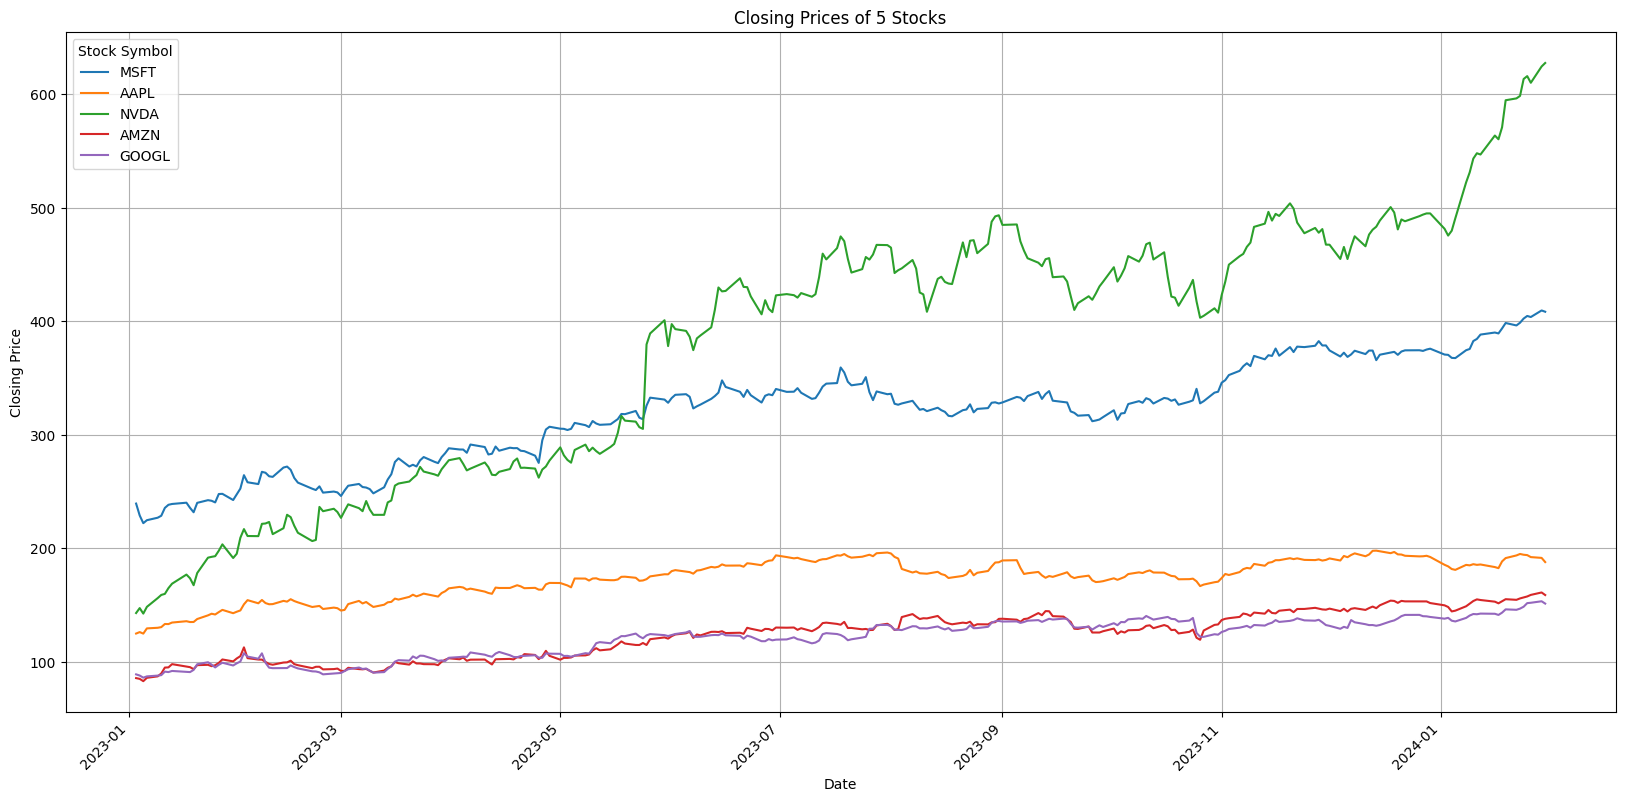

In [101]:
import matplotlib.pyplot as plt

# Plotting the closing prices for the 5 stocks
yf_data.plot(figsize=(20, 10))
plt.title('Closing Prices of 5 Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(title='Stock Symbol', loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#### Total Stocks Return for the selected period

In [102]:
# Calculate the total stocks return for the selected period
percent_change = pd.DataFrame((100 * (yf_data.iloc[-1] - yf_data.iloc[0]) / yf_data.iloc[0]), columns=['Percent Change'])

# Display the DataFrame
print(percent_change)

       Percent Change
MSFT        70.544283
AAPL        50.347800
NVDA       338.519048
AMZN        85.271499
GOOGL       69.950631


#### Daily Stocks Returns

In [103]:
# Create a DataFrame with stock returns calculated in relation to the previous day
returns = pd.DataFrame()
for stock in yf_data.columns:
    # Calculate returns for each stock
    returns[stock] = yf_data[stock].apply(lambda x: pd.np.log(x)).diff()

# Display the DataFrame
print(returns)

                MSFT      AAPL      NVDA      AMZN     GOOGL
Date                                                        
2023-01-03       NaN       NaN       NaN       NaN       NaN
2023-01-04 -0.044729  0.010261  0.029867 -0.007955 -0.011738
2023-01-05 -0.030086 -0.010661 -0.033366 -0.024012 -0.021575
2023-01-06  0.011716  0.036133  0.040797  0.034992  0.013138
2023-01-09  0.009689  0.004081  0.050458  0.014760  0.007756
...              ...       ...       ...       ...       ...
2024-01-24  0.009133 -0.003490  0.024565  0.005433  0.011226
2024-01-25  0.005722 -0.001698  0.004147  0.005594  0.021094
2024-01-26 -0.002324 -0.009054 -0.009556  0.008647  0.002105
2024-01-29  0.014232 -0.003592  0.023225  0.013359  0.008636
2024-01-30 -0.002762 -0.019433  0.004935 -0.014114 -0.013444

[270 rows x 5 columns]


<ipython-input-103-1c4ebc8ccdc4>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  returns[stock] = yf_data[stock].apply(lambda x: pd.np.log(x)).diff()
<ipython-input-103-1c4ebc8ccdc4>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  returns[stock] = yf_data[stock].apply(lambda x: pd.np.log(x)).diff()
<ipython-input-103-1c4ebc8ccdc4>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  returns[stock] = yf_data[stock].apply(lambda x: pd.np.log(x)).diff()
<ipython-input-103-1c4ebc8ccdc4>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  returns[stock] = yf_data[stock].apply(lambda x: pd.np.log(x)).diff()
<ipython-input-103-1c4ebc8ccdc4>:5: 

In [104]:
#verifying returns
returns.head(5)

,MSFT,AAPL,NVDA,AMZN,GOOGL
Date,,,,,
2023-01-03,NaN,NaN,NaN,NaN,NaN
2023-01-04,-0.044729,0.010261,0.029867,-0.007955,-0.011738
2023-01-05,-0.030086,-0.010661,-0.033366,-0.024012,-0.021575
2023-01-06,0.011716,0.036133,0.040797,0.034992,0.013138
2023-01-09,0.009689,0.004081,0.050458,0.014760,0.007756


In [105]:
returns.describe()

,MSFT,AAPL,NVDA,AMZN,GOOGL
count,269.000000,269.000000,269.000000,269.000000,269.000000
mean,0.001984,0.001516,0.005495,0.002292,0.001972
std,0.015348,0.012736,0.028916,0.020247,0.018720
min,-0.044729,-0.049211,-0.060889,-0.088083,-0.099924
25%,-0.007098,-0.006211,-0.011202,-0.009586,-0.008546
50%,0.001927,0.001266,0.004782,0.001228,0.001139
75%,0.011157,0.008744,0.021501,0.015190,0.012292
max,0.069932,0.045859,0.218088,0.079452,0.070260


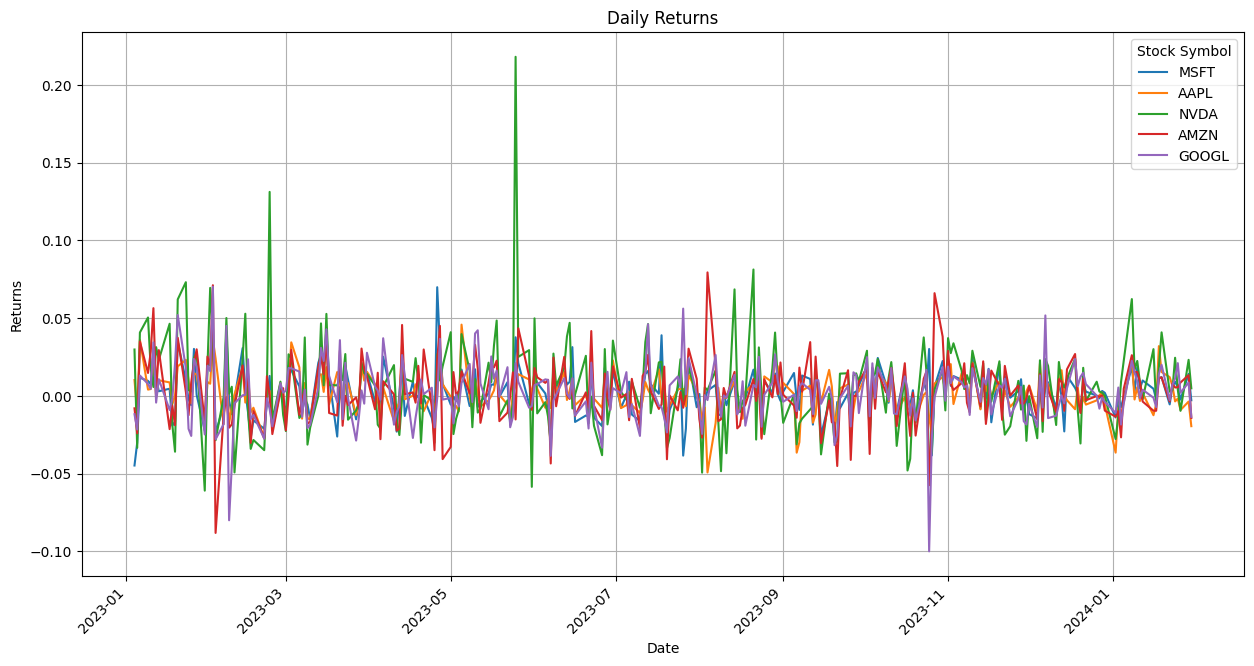

In [106]:
# Plotting daily returns
returns.plot(figsize=(15, 8))
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend(title='Stock Symbol', loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#### Standard Deviation

In [107]:
# Calculating standard deviation from the Pandas DataFrame
standard_deviation = pd.DataFrame(yf_data.std(axis=0), columns=['Standard Deviation'])

# Display the DataFrame
print(standard_deviation)

       Standard Deviation
MSFT            44.230091
AAPL            17.196210
NVDA           116.142538
AMZN            20.082660
GOOGL           16.967226


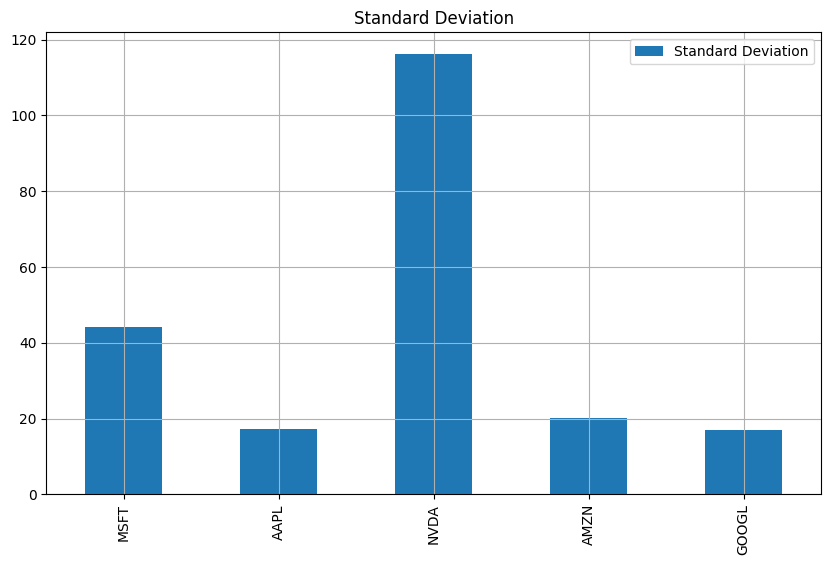

In [108]:
#plotting stock standard deviations
standard_deviation.plot.bar(figsize=(10, 6), title='Standard Deviation', grid='True')
plt.show()

#### Correlation

In [109]:
#calcualte correation
returns.corr(method='pearson')

,MSFT,AAPL,NVDA,AMZN,GOOGL
MSFT,1.000000,0.542260,0.551458,0.581075,0.511436
AAPL,0.542260,1.000000,0.457432,0.445438,0.524927
NVDA,0.551458,0.457432,1.000000,0.404392,0.420454
AMZN,0.581075,0.445438,0.404392,1.000000,0.608120
GOOGL,0.511436,0.524927,0.420454,0.608120,1.000000


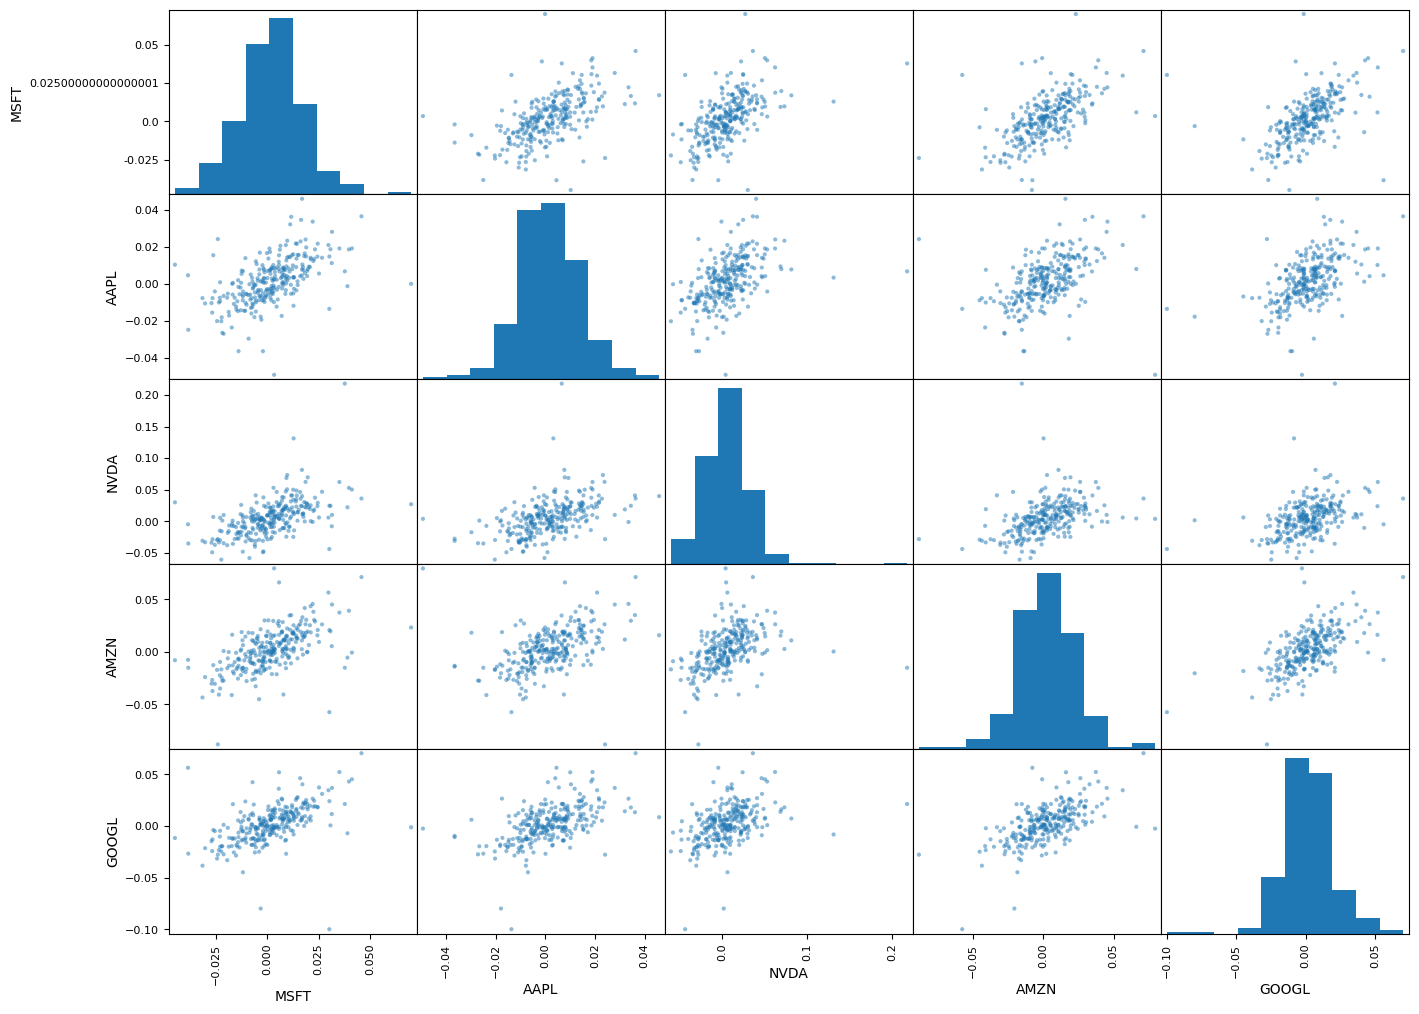

In [110]:
#plot correlation matrix
from pandas.plotting import scatter_matrix
scatter_matrix(returns, figsize=(16,12), alpha=0.5)
plt.show()